# <center> **Classification using CNN on MNIST Dataset** </center>


## Import the libraries

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import visualkeras

## Read in the dataset

In [37]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
x_train = x_train.reshape((ndata_train,28,28,1)) # One color channel for 60000 images of 28*28 pixel resolution
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]

In [40]:
x_train.shape

(60000, 28, 28, 1)

## Create functions to plot accuracy and loss 

In [41]:
#Display the accuracy and the loss values
def plot_accuracy(history):
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    if ('val_accuracy' in history.history.keys()):
      plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    return

def plot_loss(history):    
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    if ('val_loss' in history.history.keys()):
      plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    return

## Create function to plot Confusion Matrix

In [42]:
classes = 10

def confusion_matrix_plot(y_test, classes_x):
    cnf_matrix_test = metrics.confusion_matrix(y_test, classes_x)

    ticks = [str(i) for i in range(classes)]

    plt.figure(figsize=(5,5))
    plt.imshow(cnf_matrix_test, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix - Test Set', size = 15)
    tick_marks = np.arange(classes)
    plt.xticks(tick_marks, ticks, rotation=45, size = 10)
    plt.yticks(tick_marks, ticks, size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cnf_matrix_test.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cnf_matrix_test[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')
    
    return cnf_matrix_test

## Model 1

In [43]:
NNmodel1 = tf.keras.models.Sequential()
NNmodel1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel1.add(tf.keras.layers.Flatten())
NNmodel1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)))
NNmodel1.add(tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)))
NNmodel1.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [44]:
NNmodel1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 64)          102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)              

### Visualize the model

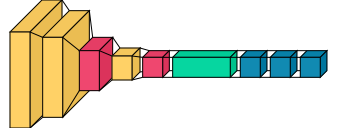

In [45]:
visualkeras.layered_view(NNmodel1)

In [46]:
## Train the CNN
history_NN1 = NNmodel1.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=50)

Epoch 1/20
960/960 [==============================] - 15s 15ms/step - loss: 0.5617 - accuracy: 0.9473 - val_loss: 0.3227 - val_accuracy: 0.9830
Epoch 2/20
960/960 [==============================] - 15s 15ms/step - loss: 0.2551 - accuracy: 0.9831 - val_loss: 0.2205 - val_accuracy: 0.9795
Epoch 3/20
960/960 [==============================] - 14s 14ms/step - loss: 0.1634 - accuracy: 0.9865 - val_loss: 0.1498 - val_accuracy: 0.9837
Epoch 4/20
960/960 [==============================] - 14s 14ms/step - loss: 0.1187 - accuracy: 0.9878 - val_loss: 0.1104 - val_accuracy: 0.9876
Epoch 5/20
960/960 [==============================] - 14s 14ms/step - loss: 0.0920 - accuracy: 0.9897 - val_loss: 0.1092 - val_accuracy: 0.9843
Epoch 6/20
960/960 [==============================] - 14s 14ms/step - loss: 0.0774 - accuracy: 0.9909 - val_loss: 0.0968 - val_accuracy: 0.9851
Epoch 7/20
960/960 [==============================] - 14s 14ms/step - loss: 0.0665 - accuracy: 0.9929 - val_loss: 0.0926 - val_accuracy:

In [47]:
## Training and validation set accuracy
print('Training set accuracy: ', round(history_NN1.history['accuracy'][19],4))
print('Validation set accuracy: ', round(history_NN1.history['val_accuracy'][19],4))

Training set accuracy:  0.9973
Validation set accuracy:  0.987


In [48]:
## Predict on x_test

NNmodel1.predict(x_test)

array([[7.7262206e-16, 4.9081191e-11, 4.9851496e-09, ..., 9.9999976e-01,
        6.8557538e-12, 1.5890883e-09],
       [7.3466806e-09, 1.8981255e-12, 1.0000000e+00, ..., 6.0436839e-10,
        2.4449170e-10, 4.4859338e-10],
       [4.0094260e-06, 9.9987435e-01, 3.0805622e-05, ..., 7.2914787e-05,
        2.3502928e-08, 7.6666112e-08],
       ...,
       [1.5911159e-15, 1.5569222e-15, 3.4565704e-14, ..., 1.2323371e-10,
        3.3015427e-14, 1.4656000e-12],
       [9.3677973e-15, 3.9074612e-16, 4.8726207e-18, ..., 6.5471894e-15,
        3.3102065e-14, 1.0719184e-12],
       [5.8952543e-10, 3.5965551e-14, 1.9173244e-18, ..., 6.1555998e-18,
        5.1688911e-15, 9.6438442e-14]], dtype=float32)

In [49]:
## Test set accuracy

pred_probs1 = NNmodel1.predict(x_test)
pred1 = np.argmax(pred_probs1, axis=1)
print(f'Accuracy: {np.mean(pred1==y_test)}')

Accuracy: 0.9881


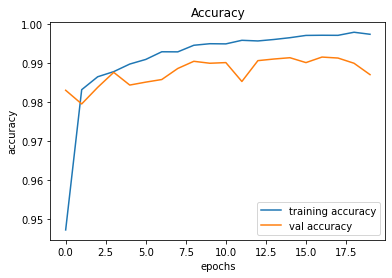

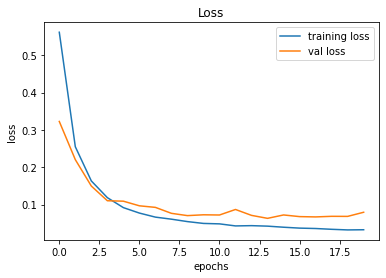

In [50]:
## Plot Accuracy and loss across different epochs
plot_accuracy(history_NN1)
plot_loss(history_NN1)

## Re-train the entire dataset with the same model architecture

In [51]:
NNmodel = tf.keras.models.Sequential()
NNmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel.add(tf.keras.layers.Flatten())
NNmodel.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)))
NNmodel.add(tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)))
NNmodel.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

NNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history_NN = NNmodel.fit(x_train,y_train,epochs=20,batch_size=50)

Epoch 1/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.4944 - accuracy: 0.9512
Epoch 2/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.2183 - accuracy: 0.9838
Epoch 3/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.1378 - accuracy: 0.9874
Epoch 4/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.1015 - accuracy: 0.9891
Epoch 5/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0822 - accuracy: 0.9903
Epoch 6/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0700 - accuracy: 0.9919
Epoch 7/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0624 - accuracy: 0.9926
Epoch 8/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0554 - accuracy: 0.9938
Epoch 9/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0526 - accuracy: 0.9941
Epoch 10/20
1200/1200 [==============================] - 16s 13m

### Training set accuracy

In [53]:
## Training set accuracy
print('Training set accuracy: ', round(history_NN.history['accuracy'][19],4))

Training set accuracy:  0.9978


In [54]:
## Predict on the test set
NNmodel.predict(x_test)

array([[5.9884098e-14, 3.6000794e-12, 8.0628606e-16, ..., 1.0000000e+00,
        9.0165024e-19, 7.6088656e-11],
       [1.4646058e-07, 8.7564850e-08, 9.9999881e-01, ..., 9.7555733e-07,
        1.2029223e-08, 5.2726556e-10],
       [1.3295499e-07, 9.9999118e-01, 1.5027226e-08, ..., 2.1223277e-06,
        2.2147454e-07, 2.2768795e-08],
       ...,
       [1.9881155e-15, 3.7011375e-10, 1.4273585e-11, ..., 2.1957727e-10,
        1.7530568e-12, 2.7229160e-11],
       [9.0273185e-17, 1.3473826e-16, 7.3011866e-23, ..., 2.0561528e-15,
        3.8832439e-14, 2.3887611e-12],
       [1.9018875e-08, 1.9777225e-11, 7.7539072e-11, ..., 1.1928693e-14,
        8.0074888e-12, 2.1408273e-15]], dtype=float32)

### Print test set accuracy

In [55]:
## Test set accuracy
pred_probs = NNmodel.predict(x_test)
pred = np.argmax(pred_probs, axis=1)
print(f'Accuracy: {np.mean(pred==y_test)}')

Accuracy: 0.9935


#### **Inferences:**

- From the results above, we see that the test set accuracy after re-training the model on the entire training set : **0.9919**
- The accuracy on the training set after training is **0.9971**. As expected the test accuracy is lower than the train accuracy. However, the model does perform well even with the test data, indicating that the model is a good-fit for the dataset
- Comparing with the test set accuracy of **0.992** before re-training the model, we see that the test set accuracy after re-training is almost equal. 

### Plot accuracy and loss

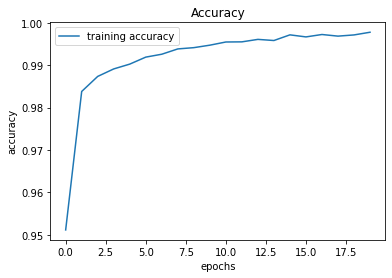

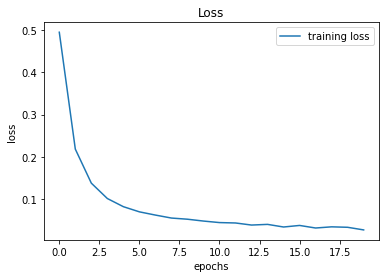

In [56]:
## Plot accuracy and loss across different epochs
plot_accuracy(history_NN)
plot_loss(history_NN)

### Plot confusion matrix

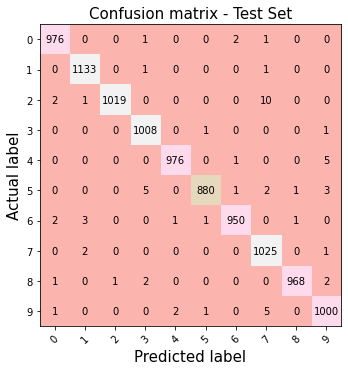

In [57]:
## Plot the confusion matrix
cnf_matrix_test = confusion_matrix_plot(y_test, pred)

### Plot misclassified images

### Function to display common patterns in image misclassification

In [58]:
def misclassified_img(cnf_matrix_test, X_test, y_test):

    cnf_matrix_new = cnf_matrix_test
    np.fill_diagonal(cnf_matrix_new, 0)
    cnf_matrix_new = pd.DataFrame(cnf_matrix_new)

    index = []
    cols = []
    val = []

    for i in range(classes):
        lst = cnf_matrix_new.index[cnf_matrix_new[i]>3].to_list()
        if len(lst)>0:
            index.append(lst)
            cols.append([i]*len(lst))
            
    t = []
    [t.extend(x) for x in index]
    index = t
    
    t = []
    [t.extend(x) for x in cols]
    cols = t

    return index,cols

def plot_misclassified_img(index, cols, X_test, y_test, grid_x, grid_y, y_pred):
    i = 0
    fig, ax = plt.subplots(grid_x, grid_y, sharex= True, sharey=False)
    fig.set_size_inches(15, 15,  forward=True)

    for idx, ax_i in enumerate(ax.flatten()):
        actual_class = index[idx]
        predicted_class = cols[idx]
        mask_actual_2 = (y_test == actual_class)
        mask_wrong_predictions = (y_pred == predicted_class)

        final_mask = mask_wrong_predictions & mask_actual_2

        missclassified = X_test[final_mask][0]
        missclassified = np.reshape(missclassified, (28,28))

        ax_i.imshow(missclassified)
        ax_i.set_title(f'Actual: {actual_class};\nPredicted: {predicted_class}\n#Misclassifications: {final_mask.sum()}',fontsize=16)
        ax_i.axis('off')

    plt.show()

In [59]:
## Identify the most common patterns of misclassification
index,cols = misclassified_img(cnf_matrix_test, x_test, y_test)
print(f'Actual class: {index}, Predicted class: {cols}, Most common combinations of misclassifications: {len(index)}')

Actual class: [5, 2, 9, 4], Predicted class: [3, 7, 7, 9], Most common combinations of misclassifications: 4


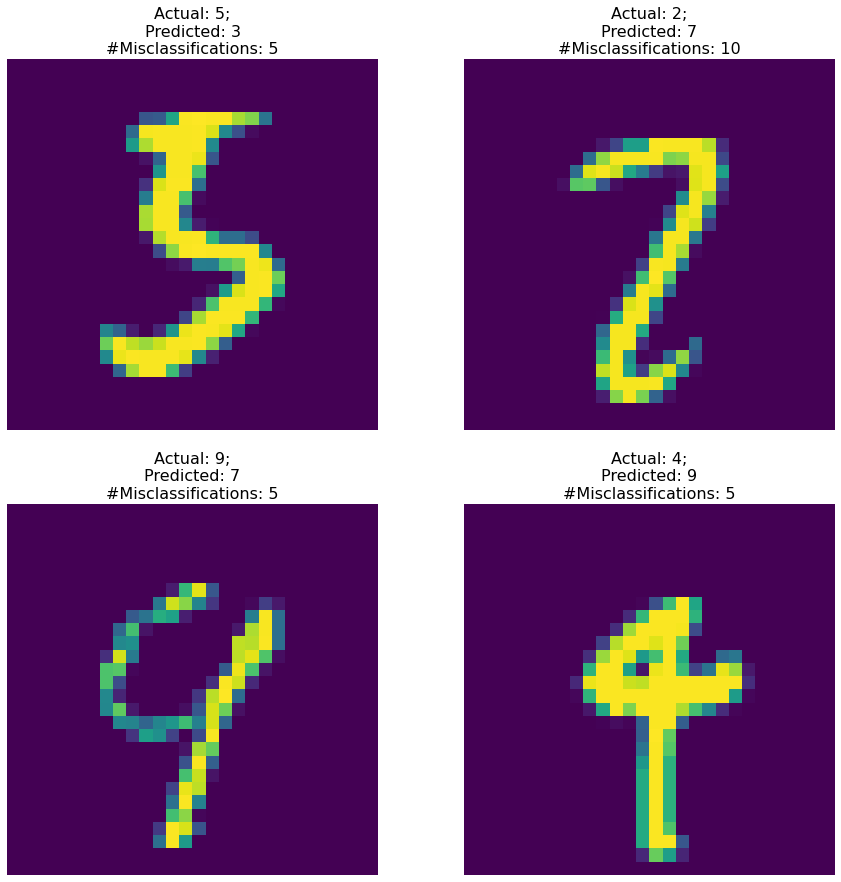

In [61]:
plot_misclassified_img(index, cols, x_test, y_test, 2, 2, pred)

#### **Inferences:**

- Looking at the confusion matrix, we see some non-diagonal elements with non-zero values. These values indicate incorrectly classified images
- Checking for common patterns, where misclassified image count > 3, we see 8 combinations of images that are misclassified
- Printing out a sample image from each of the above combination shows that the images do not clearly show a difference between the digits, which could easily cause the CNN to misclassify images with common patterns. 
- Additionally, as these handwritten digits dataset have been manually labelled, there will be certain images that the human has labelled, but the CNN cannot catch the patterns in the image, which might alway cause some amount of misclassification. Hence, there is a very low possibility of ever getting a 100% accuracy on this dataset 












## END-OF-CODE